**<h1>Twitter US Airline Sentiment</h1>**

**Background and Context**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 
**Data Description**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

**Dataset**

The dataset has the following columns:

- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason                  
- negativereason_confidence
- airline
- airline_sentiment_gold                                       
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

**Defining the problem, Importing the libraries, loading and description of the data.**

### **Problem Definition**

###**Load Libraries, Import Modules**

In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#install nltk
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#install vader sentiment package
!pip install vaderSentiment 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.9 MB/s eta 0:00:00


In [ ]:
#install textblob package
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#install contractions package
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
#install BeautifulSoup to remove html tags
!pip install Beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

# Helps to display the images
from PIL import Image

#nltk
import nltk

import re, string, unicodedata
import contractions
from bs4 import BeautifulSoup

import nltk
import seaborn as sns

#tokenization
nltk.download('punkt')

#dependency for tokenization
nltk.download('omw-1.4')

#stopwords
nltk.download('stopwords')

#BeautifulSoup
from bs4 import BeautifulSoup

import nltk
nltk.download('wordnet')

#stopwords corpus
from nltk.corpus import stopwords                      

from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#stemming and lemming
from nltk.stem import PorterStemmer

#BOW Bag of words
from sklearn.feature_extraction.text import CountVectorizer          

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Create train and test data
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Check NLTK version installed

In [ ]:
print(nltk.__version__)

3.8.1


###**Useful Functions**

In [ ]:
#Create color dictionary
color_dict = {
    'American' :'#0A3A8E',
    'United': '#05B0EC',
    'Delta':'#EC7105',
    'US Airways':'#CA8E03',
    'Southwest':'#BE03CA',
    'Virgin America':'#04D340',
    'negative':'#FF2D00',
    'neutral':'#959595',
    'positive':'#0156EA',
}

#Function to show %
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

# function to create labeled barplots
def labeled_barplot(data, feature, color_dict=None, perc=False, n=None, sort_order='desc', ax=None, 
                    rotate_labels=None, title=None, xtick_fontsize=None, title_fontsize=None, 
                    show_subtitle=True, 
                    show_x_label_column=True, x_label=None, 
                    show_y_label_column=True, y_label=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    color_dict: dictionary mapping labels to colors (optional)
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    sort_order: sorting order for the categories ('desc' for descending, 'asc' for ascending, 'alpha' for alphabetical)
    ax: subplot axes (optional)
    rotate_labels : rotate the x-axis label by certain degrees (optional)
    title : a string that is the title of the plot or subplot
    xtick_fontsize: font size for the x labels. If "None" then use default (optional)
    title_fontsize : font size for the title (if any). If "None" then use default (optional)
    show_subtitle:
    show_x_label: do not show x_label. If None, specify x_label. If x_label empty, then no x_label.
    x_label: use this text as the x label, to use x_label=None
    y_label: use this text as the y label
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()

    if ax is None:
        fig, ax = plt.subplots(figsize=(count + 2, 6))
    else:
        fig = ax.get_figure()

    if color_dict is None:
        palette = "flare"
        order = data[feature].value_counts().index[:n]
    else:
        if sort_order == 'desc':
            ordered_counts = data[feature].value_counts().sort_values(ascending=False)
        elif sort_order == 'asc':
            ordered_counts = data[feature].value_counts().sort_values(ascending=True)
        elif sort_order == 'alpha':
            ordered_counts = data[feature].value_counts().sort_index()
        else:
            raise ValueError("Invalid sort_order value. Use 'desc', 'asc', or 'alpha'.")

        order = list(ordered_counts.index)[:n]
        palette = [color_dict[label] for label in order]

    if rotate_labels is None:
        rotate_labels = 0
    else:
        rotate_labels = rotate_labels

    ax.set_xticklabels(order, rotation=rotate_labels, fontsize=xtick_fontsize)
    sns.countplot(data=data, x=feature, palette=palette, order=order, ax=ax)

    for p in ax.patches:
      if perc:
        label = "{:.1f}%".format(100 * p.get_height() / total)
      else:
        label = p.get_height()

      x = p.get_x() + p.get_width() / 2
      y = p.get_height()

      if not show_x_label_column:
        if x_label == "":
          ax.set(xlabel="")
        else:
          ax.set(xlabel=x_label)

      if not show_y_label_column:
        if y_label =="":
          ax.set(ylabel="")
        else:
          ax.set(ylabel=y_label)

      ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    if show_subtitle:
        ax.set_title(title, fontsize=title_fontsize)
    else:
        ax.set_title("", fontsize=title_fontsize)
    

    return ax


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Function to print the classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['negative', 'positive'], yticklabels = ['negative', 'positive'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

def get_top40_words(model, all_features):
    
    # Addition of top 40 feature into top_feature after training the model
    top_features=''   

    feat = model.feature_importances_

    features = np.argsort(feat)[::-1]

    for i in features[0:40]:
        top_features+=all_features[i]
        top_features+=','    

    from wordcloud import WordCloud
    
    wordcloud = WordCloud(background_color = "white", colormap = 'viridis', width = 2000, 
                              height = 1000).generate(top_features)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.figure(1, figsize = (10, 10), frameon='equal')
    plt.title('Top 40 features WordCloud', fontsize = 10)
    plt.axis("off")
    plt.show()

###**Loading and Interpreting the Data**

In [ ]:
#allow access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#read csv file and load into a panda dataframe
data = pd.read_csv('/content/gdrive/MyDrive/UT-ML/Projects/Project9/Tweets.csv')

In [ ]:
#make a copy of dataframe
dataw = data.copy()

**Shape of dataframe**

In [ ]:
#shape of data
dataw.shape

(14640, 15)

There are 14660 lines and 15 columns in the dataset.

**Dataframe info**

In [ ]:
dataw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Notice there are null/missing values in the dataset. 

**Visualize dataframe head**

In [ ]:
dataw.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Visualize dataframe tail**

In [ ]:
dataw.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


**Features Description**

In [ ]:
#create list to hold features
col_names = []
for col in dataw.columns:
  col_names.append(col)

print(col_names)

['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']


In [ ]:
#create list to hold datatypes
col_types = []
for x in dataw.dtypes:
  col_types.append(x)

print(col_types)

[dtype('int64'), dtype('O'), dtype('float64'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]


Features description gathered from dataframe review.

- tweet_id: unique id number of the tweet.
- airline_sentiment: positive, negative or neutral sentiment towards the airline.
- airline_sentiment_confidence: how confident the airline sentiment is.
- negativereason: Very short reference to why the sentiment was negative.
- airline: Name of the airline
- airline_sentiment_gold: I am not sure what this is.
- name: Name of the tweeter
- negativereason_gold: I am not sure what this is.
- retweet_count: How many times the tweet was retweeted.
- text: content of the tweet.
- tweet_coord: geographical coordinates where the tweet originated in latitude and longitude.
- tweet_created: data and time when the tweet was created.
- tweet_location: the location where the tweeter originated the tweet.
- user_timezone: timezone where the user lives.

In [ ]:
desc = ['unique id number of the tweet.','positive, negative or neutral sentiment towards the airline.','How confident the airline sentiment is.',
             'Very short reference to why the sentiment was negative.','Name of the airline','I am not sure what this is.','Name of the tweeter.',
             'I am not sure what this is.','How many times the tweet was retweeted.;','Content of the tweet.',
             'Geographical coordinates where the tweet originated in latitude and longitude.','Data and time when the tweet was created.',
             'The location where the tweeter originated the tweet.','Timezone where the tweet originated.','Timezone where the user lives.']

**Data fields Interpretation**

In [ ]:
#extend columns width so all the text can be visualized
pd.set_option('display.max_colwidth',None)

In [ ]:
#assemble a dataframe to summarize features description
feature_data = {'Feature':col_names,
                'data_type': col_types,
                'description': desc }
features_df = pd.DataFrame(feature_data)
features_df

,Feature,data_type,description
0,tweet_id,int64,unique id number of the tweet.
1,airline_sentiment,object,"positive, negative or neutral sentiment towards the airline."
2,airline_sentiment_confidence,float64,How confident the airline sentiment is.
3,negativereason,object,Very short reference to why the sentiment was negative.
4,negativereason_confidence,float64,Name of the airline
5,airline,object,I am not sure what this is.
6,airline_sentiment_gold,object,Name of the tweeter.
7,name,object,I am not sure what this is.
8,negativereason_gold,object,How many times the tweet was retweeted.;
9,retweet_count,int64,Content of the tweet.


**Unique entries**

In [ ]:
dataw.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

Notice a few interesting characteristics of the dataset. There are 3 types of <airline_sentiment> (as expected), there are only 10 different types of <negativereason>. 
There are 14,427 different <text> entries made in 14,247 different <tweets>. 
There are only 6 airlines included in the dataset, users are in 3,081 different locations and 85 different time zones.
We do not expect all features to be useful and many - if not most - will be dropped in our analysis.

**Check duplicated entries**

In [ ]:
#Duplicated data
dups = dataw.duplicated().sum()
print("There are ",dups, " duplicated entries in the dataset.")

There are  36  duplicated entries in the dataset.


There are 36 duplicated entries See below:

In [ ]:
#visualize samples of duplicated entries
text_dups = dataw["text"]
sorteddups = dataw[text_dups.isin(text_dups[text_dups.duplicated()])].sort_values("text")
pd.options.display.max_rows =int(dups)
sorteddups.head(dups)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12067,570301488192458752,negative,1.0000,Customer Service Issue,1.0000,American,NaN,skgiffard,NaN,0,.@AmericanAir can you connect me to a person without having to wait 2+ hours on hold? I still haven't been able to resolve the problem.,NaN,2015-02-24 11:17:25 -0800,"Boston, MA",Eastern Time (US & Canada)
11906,570301488192458752,negative,0.6703,Customer Service Issue,0.6703,American,NaN,skgiffard,NaN,0,.@AmericanAir can you connect me to a person without having to wait 2+ hours on hold? I still haven't been able to resolve the problem.,NaN,2015-02-24 11:17:25 -0800,"Boston, MA",Eastern Time (US & Canada)
11902,570303383782989824,neutral,1.0000,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Flight Booking Problems process and add’l fees to sit together on a more crowded flight. Not impressed so far :-/.,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
12063,570303383782989824,neutral,1.0000,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Flight Booking Problems process and add’l fees to sit together on a more crowded flight. Not impressed so far :-/.,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
11946,570288282413633536,negative,1.0000,Lost Luggage,0.6593,American,NaN,jacquelinewins6,NaN,0,@AmericanAir\n Your response could have made all the difference. It could have made the situation better. NO TRUST...GET LOST like my bag.,NaN,2015-02-24 10:24:56 -0800,NaN,NaN
12107,570288282413633536,negative,1.0000,Lost Luggage,1.0000,American,NaN,jacquelinewins6,NaN,0,@AmericanAir\n Your response could have made all the difference. It could have made the situation better. NO TRUST...GET LOST like my bag.,NaN,2015-02-24 10:24:56 -0800,NaN,NaN
12128,570281010606120960,negative,1.0000,Can't Tell,0.6590,American,NaN,jacquelinewins6,NaN,0,@AmericanAir \nIt's not what happens to us that matters...It's our response that matters. Way to drop the ball AA.,NaN,2015-02-24 09:56:02 -0800,NaN,NaN
11967,570281010606120960,negative,1.0000,Customer Service Issue,0.6523,American,NaN,jacquelinewins6,NaN,0,@AmericanAir \nIt's not what happens to us that matters...It's our response that matters. Way to drop the ball AA.,NaN,2015-02-24 09:56:02 -0800,NaN,NaN
13995,569680231012773888,negative,1.0000,Customer Service Issue,1.0000,American,NaN,LBernieMeyer,NaN,0,@AmericanAir 800 number will not even let you wait for next customer rep. Very frustrating. Can't talk to humans.,NaN,2015-02-22 18:08:45 -0800,NaN,NaN
12029,569680231012773888,negative,1.0000,Customer Service Issue,0.9620,American,negative,LBernieMeyer,Customer Service Issue,0,@AmericanAir 800 number will not even let you wait for next customer rep. Very frustrating. Can't talk to humans.,NaN,2015-02-22 18:08:45 -0800,NaN,NaN


**Check Missing/Null values**

In [ ]:
#Check missing values
dataw.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Notice that there are features that are mostly null or empty.

The dataset contains 14,660 entries.

These are: 
- airline_sentiment_gold (14600 ~ 100% empty/null)
- negativereason_gold (14608 ~ 100% empty/null)
- tweet_coord (13621 ~ 93% empty/null)

These features have also many empty/null entries.
- negativereason (5462 ~ 37% empty/null)
- negativereason_confidence (4118 ~ 28% empty/null)
- tweet_location (4733 ~ 32% empty/null)
- user_timezone (4820 ~ 32% empty/null)


We anticipate that airline_sentiment_gold, negativereason_gold, and tweet_cord will be dropped. Simply because the first two are entirely null and third one, has more than 90% null values.

## **Exploratory data analysis**



**Overall Tweets Distribution by Airline**

- Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 


In [ ]:
airlines = {"Airline": dataw['airline'].unique()}
airlines_df = pd.DataFrame(airlines).sort_values(by='Airline', ascending=True)
no_airlines = dataw['airline'].unique().sum()
print("There are ",no_airlines, " airlines in the dataset.")
airlines_df.style.hide_index()

There are  Virgin AmericaUnitedSouthwestDeltaUS AirwaysAmerican  airlines in the dataset.


Airline
American
Delta
Southwest
US Airways
United
Virgin America


There are 6 different airlines in the dataset.

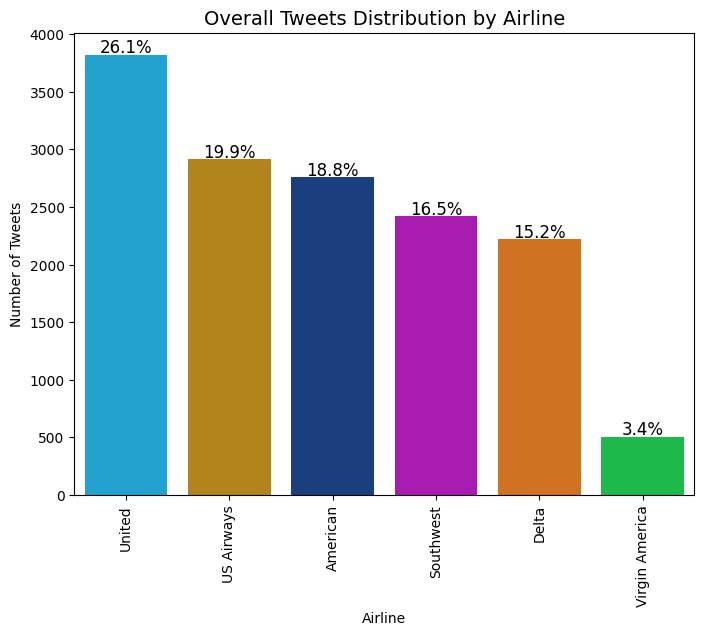

In [ ]:

labeled_barplot(dataw,"airline", color_dict, perc=True, sort_order='desc', rotate_labels=90, title="Overall Tweets Distribution by Airline", 
                xtick_fontsize=10, title_fontsize=14, show_x_label_column=False,x_label="Airline",
                show_y_label_column=False, y_label="Number of Tweets")
plt.show()

In [ ]:

# Count the number of occurrences of each airline
airline_counts = dataw['airline'].value_counts().reset_index()

# Rename the columns
airline_counts.columns = ['airline', 'count']

# Calculate the percentage
airline_counts['percentage'] = (airline_counts['count'] / len(dataw)) * 100

# Format the percentage column to display two decimal places
airline_counts['percentage'] = airline_counts['percentage'].map('{:.2f}%'.format)

# Sort the dataframe by count in descending order
airline_counts = airline_counts.sort_values('count', ascending=False)

# Reset the index
airline_counts = airline_counts.reset_index(drop=True)

# Remove the column name 'airline'
airline_counts.columns = ['', 'count', 'percentage']

# Display the resulting dataframe without the column name 'airline'
print(airline_counts.to_string(index=False))

                count percentage
        United   3822     26.11%
    US Airways   2913     19.90%
      American   2759     18.85%
     Southwest   2420     16.53%
         Delta   2222     15.18%
Virgin America    504      3.44%


United has 26% of all tweets and Virgin America only 3.4%. American 19% and Delta 15%. Notice that American, Delta, and United were the three largest US airlines. Lets keep in mind that the dataset may only include some regions of the US, to be found out later.

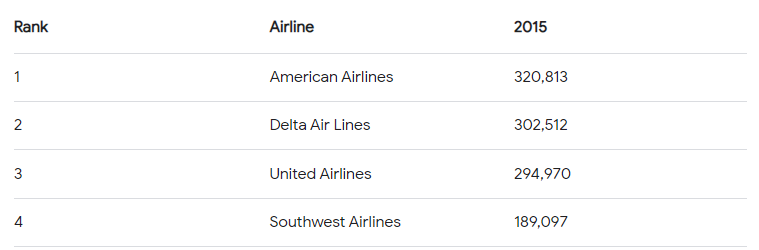

**Overall Airline Sentiment Class Distributon for all airlines**

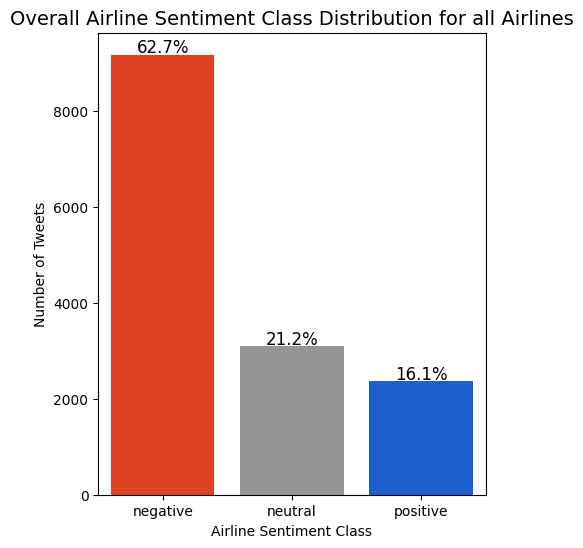

In [ ]:
labeled_barplot(dataw,"airline_sentiment", color_dict, perc=True,sort_order="alpha", title="Overall Airline Sentiment Class Distribution for all Airlines",
                xtick_fontsize=10, title_fontsize=14, show_x_label_column=False,
                x_label="Airline Sentiment Class", show_y_label_column=False, y_label="Number of Tweets")
plt.show()

In [ ]:
# Count the number of occurrences of each sentiment class
sent_counts = dataw['airline_sentiment'].value_counts().reset_index()

# Rename the columns
sent_counts.columns = ['airline_sentiment', 'count']

# Calculate the percentage
sent_counts['percentage'] = (sent_counts['count'] / len(dataw)) * 100

# Format the percentage column to display two decimal places
sent_counts['percentage'] = sent_counts['percentage'].map('{:.2f}%'.format)

# Sort the dataframe by count in descending order
sent_counts = sent_counts.sort_values('count', ascending=False)

# Reset the index
sent_counts = sent_counts.reset_index(drop=True)

# Remove the column name 'airline'
sent_counts.columns = ['sentiment', 'count', 'percentage']

# Display the resulting dataframe without the column name 'sentiment'
print(sent_counts.to_string(index=False))

sentiment  count percentage
 negative   9178     62.69%
  neutral   3099     21.17%
 positive   2363     16.14%


The dataset contains an overwhelming 63% negative airline sentiment class, a 21% neutral sentiment class, and a 16% positive sentiment class. While the labeled data is imbalanced, this is what we expected. Most customers are quick to express negative feelings about a service, and significantly less customers will express positive feelings. Therefore, although imbalanced, the labeled dataset is good.

**Airline Sentiment Class Distribution for each airline**

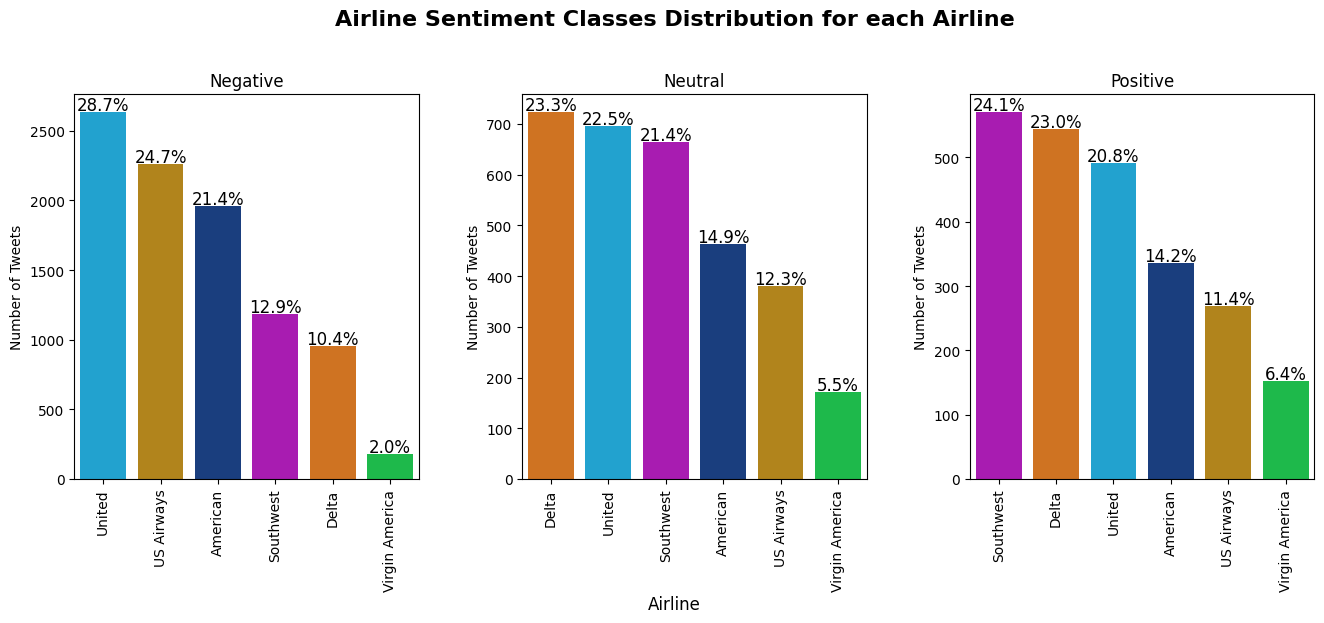

In [ ]:
sentiments = ['negative', 'neutral', 'positive']
titles = ['Negative', 'Neutral', 'Positive']
subtitle = 'Airline Sentiment Classes Distribution for each Airline'
bottomtitle = 'Airline'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for idx, sentiment in enumerate(sentiments):
    airline_data = dataw[dataw['airline_sentiment'] == sentiment]
    ax = axes[idx]
    
    labeled_barplot(airline_data, "airline", color_dict, perc=True, sort_order='desc', rotate_labels=90, ax=ax, title=titles[idx], xtick_fontsize=10, title_fontsize=12, 
                    show_x_label_column=False,
                    show_y_label_column=False, y_label="Number of Tweets")
    
   # ax.set_xlabel('')
   # ax.set_ylabel("Count", fontsize=10)

fig.suptitle(subtitle, fontsize=16, fontweight='bold', ha='center', y=1.05)
fig.text(0.5, -0.15, bottomtitle, fontsize=12, ha='center')
plt.show()


To understand the above plots, keep in mind that the percentages are the distribution within their class.

Lets take a look at the Negative sentiment plot first. United has 29% of all negative sentiment tweets, US Airways has 25%, American has 21%, Southwest 13%, and Delta 10%. Remember that United has 26% of all tweets, US Airways 20%, American 19%, Southwest 17%, and Delta 15%.

In the Neutral sentiment plot we noticed that Delta has 23%, United 23%, Southwest 21%, American 15%, USAirways 12%. 

In the Positive sentiment plot, Southwest leads with 24%, Delta has 23%, United 21%, American 14%, USAirways 11%.

There are some important observations we can make from the plots.

1. Virgin America, albeit, the smaller of all the airlines in the dataset, has 2% of all negative tweets, 5.5% of all neutral tweets, and 6.4% of all positive tweets. So Positive>Neutral>Negative. This doesn't mean that the number of Positive tweets for Virgin are more than the number of Negative tweets. It means that its share from negative to neutral to positive increased, which in a way, is a good thing. 

2. Delta, the second largest company had 10.4% negative, 23.2% neutral, and 23% positive. So, the share neutral>positive>negative, is a good thing.

3. Southwest, the fourth largest company, had 12.9% negative, 21.4% neutral, and 24.1% positive. This is also good, as Positive> Neutral>Negative. Consider that Southwest is much larger than Virgin America, and as a company grows in size, its problems grow too.

4. US Airways (now merged with American) smaller than Delta, American, United, Southwest, but larger than Virgin America, had 24.7% negative, 12.3% neutral, and 11.4% positive. This is not exactly a good thing when compared to other airlines.

5. American, the largest airline, had 21.4% positive, 14.9% neutral, and 14.2% positive. As the case for US Airways this is not a good thing when compared to other airlines.

6. United, the second largest airline, had 28.7% negative, 22.5% neutral, and 20.8% positive. This is similar to the case for USAirways and American, not good when compared to other airlines.

To actually get a better glimpse of how each airline fared, we should consider the sentiment class distribution for each airline as percentages within their own group, as we will do next.


**Airline Sentiment Class Distribution for each Airline**

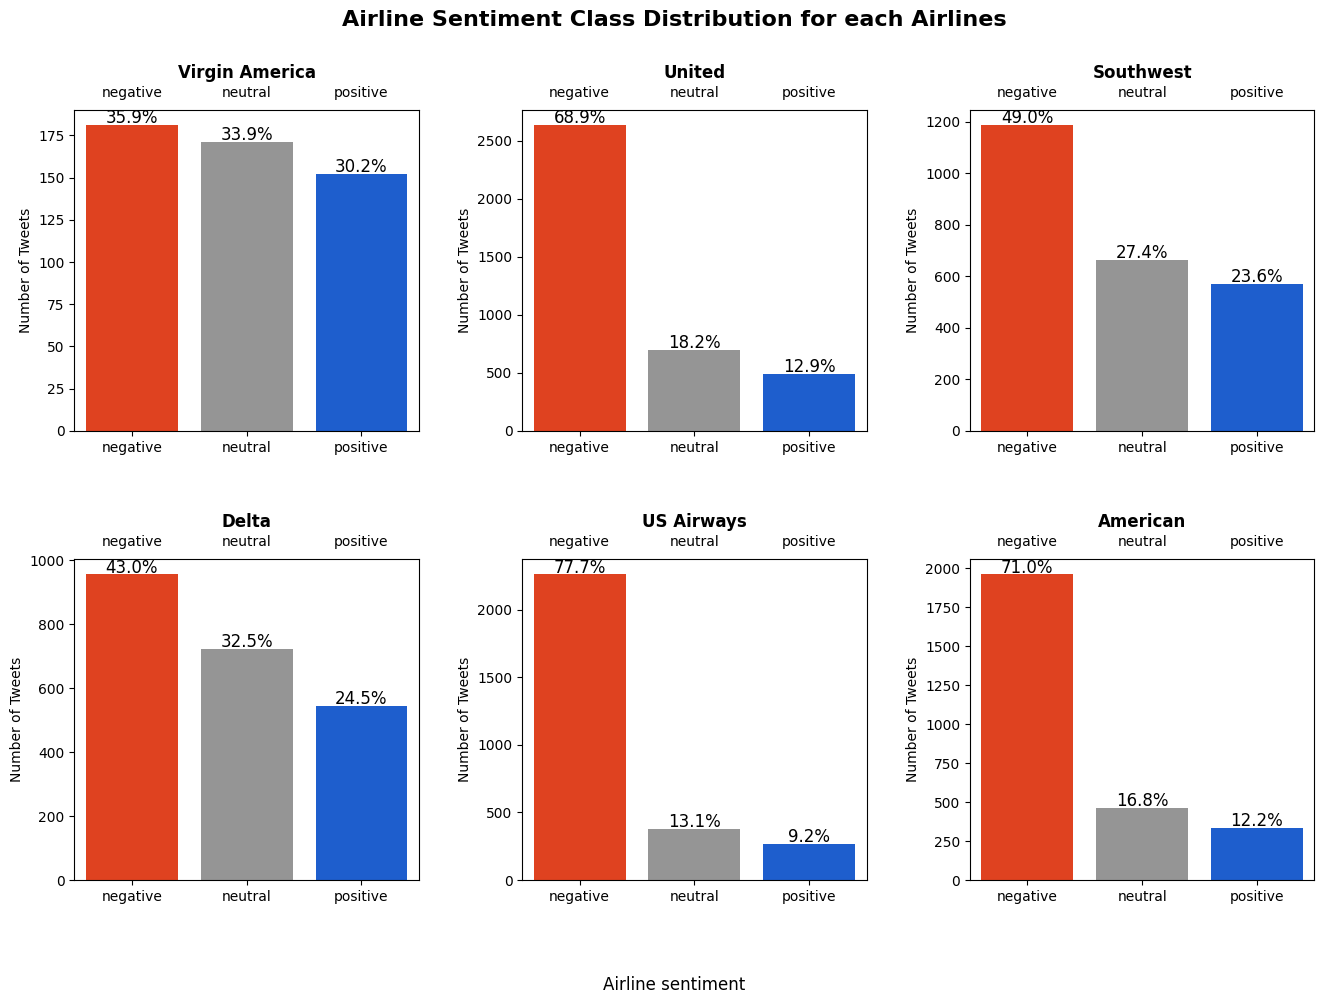

In [ ]:
# Define the data and subplots for airline Sentiment Distribution
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

subtitle = 'Airline Sentiment Distribution'
bottomtitle = 'Airline sentiment'

airlines = dataw['airline'].unique()

for idx, airline in enumerate(airlines):
    airline_data = dataw[dataw['airline'] == airline]
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    labeled_barplot(airline_data, "airline_sentiment", color_dict, perc=True, sort_order="alpha", ax=ax, title=airline, 
                    xtick_fontsize=10, title_fontsize=12, 
                    show_x_label_column=False, x_label = "",
                    show_y_label_column=False, y_label ="Number of Tweets")
    
    ax.set_xlabel('')
   
    
    ax.set_title(airline, fontsize=12, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), visible=True)

plt.suptitle("Airline Sentiment Class Distribution for each Airlines", fontsize=16, fontweight='bold')
fig.text(0.5, 0.0, bottomtitle, fontsize=12, ha='center')
plt.show()

For the above plots, notice that each bar for every sentiment class represents the percentage of each class for the total number of tweets for each airline.

From the above plots we can see better the level of negativity or positivity of the tweets.

1.For Virgin America, we notice 36% positive, 34% neutral and 30% negative. This is roughly divided into three similar one-thirds for each class. So roughly, Virgin America has 33%-33%-33% for negative, neutral, and positive distribution.

2.United, American, US Airways all overwhelmingly have very large negative class sentiment percentages compared to neutral and positive classes. US Airways is the most negative. Roughly, all these airlines show a 70%-20%-10% for negative, neutral, ad positive distribution.

3.Delta and Southwest show more balance between classes that the previous three. Roughly, they show 45%-30%-25%. 

Of the six airlines, Virgin America seems to outperform all. However, keep in mind that Virgin America is a much smaller airline compared to the others. Larger operations have more problems. Other factors include whether the airlines flew to the same locations or number of flights within the same location. For example, what if a region experienced severe weather or an airport was closed due to a technical difficulty?



Below we will plot the sentiment class distribution for every airlines as stacked plots.

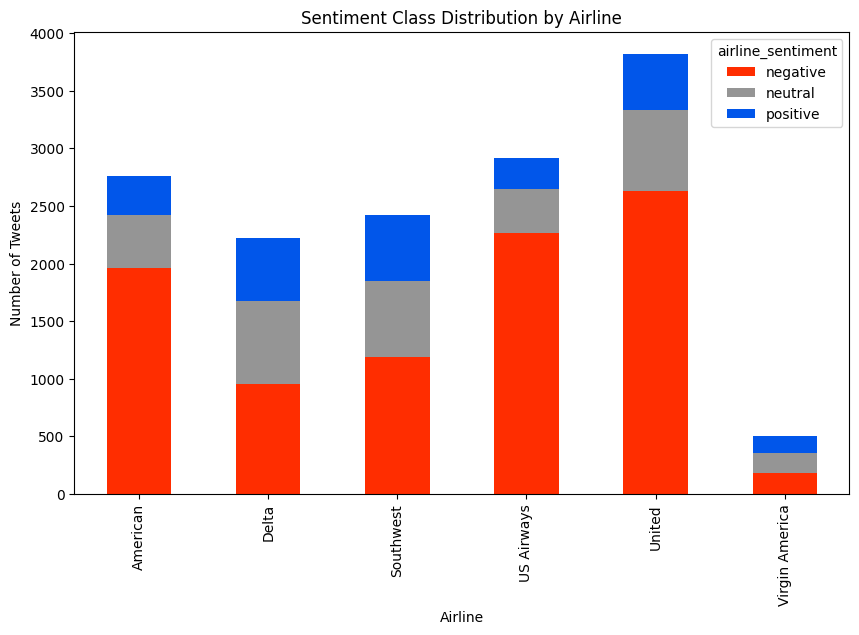

In [ ]:
grouped_airline_data = dataw.groupby(['airline', 'airline_sentiment']).size().unstack()

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_airline_data.plot(kind='bar', stacked=True, ax=ax, color = color_dict)

# Set the labels and title
ax.set_xlabel('Airline')
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Class Distribution by Airline')

# Show the plot
plt.show()

It is difficult to make conclusions from the above plot. However, I could guess that US Airways is probably the airline that has the largest negative proportion to neutral and positive, followed by American, and United. From the previous plot, we noticed that US Airways had 77.7% negative, 13.1% neutral, and 9.2% positive, American 71% negative, 16.8% neutral, and 12.2% positive, United 68.9% negative, 18.2% neutral, and 12.9% positive. So it seems that US airways is the airline that had more negative sentiment tweets within its customers, followed by American, and United. 

**Word Clouds**

**Word Cloud Negative Sentiment**

In [ ]:
#create a dataframe of only negative sentiments
negative_reasons = dataw[dataw['airline_sentiment']=='negative']

#join negative reviews using a separator
words = ' '.join(negative_reasons['text'])

#remove the \n characters from words
cleaned_words = ' '.join([word for word in words.split()])

In [ ]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_words) # The generate() function takes one argument of the text we created, helps to generate the wordclouds

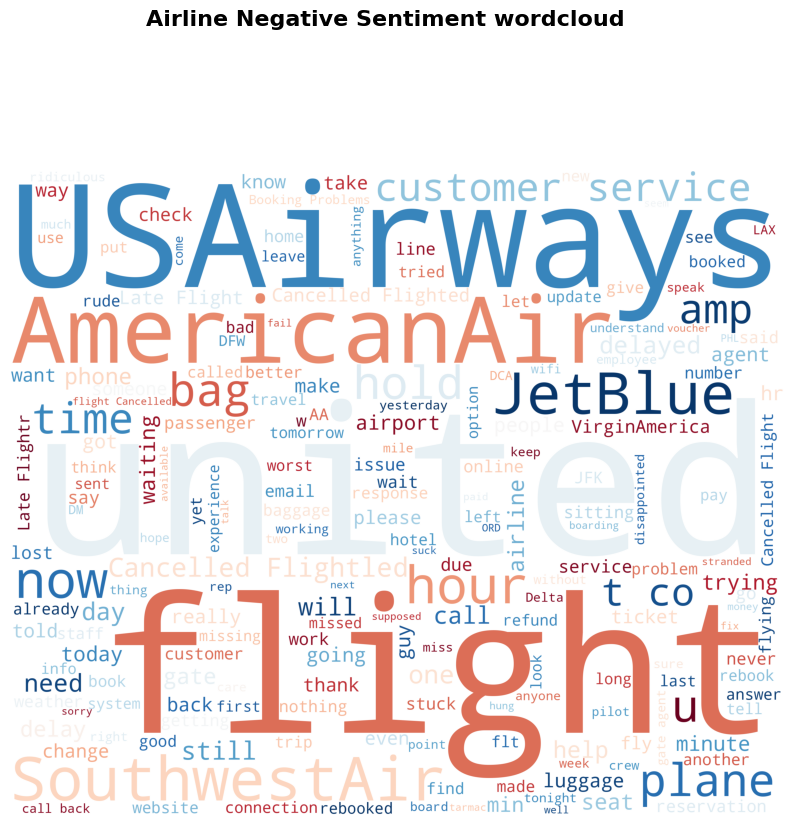

In [ ]:
plt.figure(1, figsize = (10, 10))
plt.suptitle("Airline Negative Sentiment wordcloud", fontsize=16, fontweight='bold')
# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Notice most frequent words: "flight", "AmericanAir", "USAirways","SouthwestAir", "JetBlue", "now", "hold", "plane", "customer service", "bag", "hour", "time", "u", "delayed".

**Word Cloud Positive Sentiment**

In [ ]:
#create a dataframe of only positive sentiments
positive_reasons = dataw[dataw['airline_sentiment']=='positive']

##join negative reviews using a separator
words = ' '.join(positive_reasons['text'])

#remove the \n characters from words
cleaned_words = ' '.join([word for word in words.split()])

In [ ]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_words) # The generate() function takes one argument of the text we created, helps to generate the wordclouds

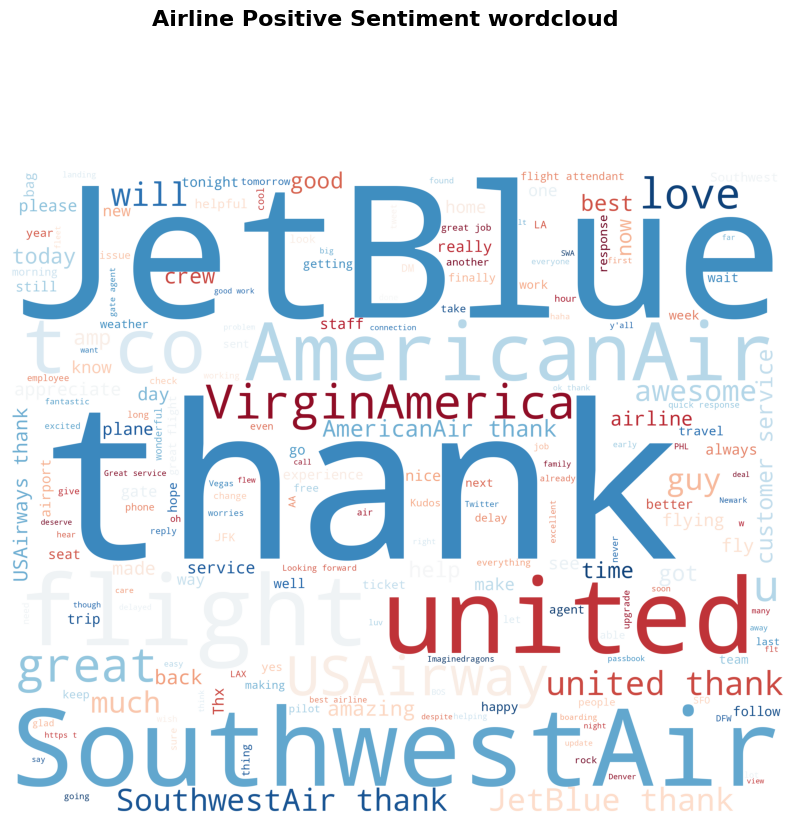

In [ ]:
plt.figure(1, figsize = (10, 10))
plt.suptitle("Airline Positive Sentiment wordcloud", fontsize=16, fontweight='bold')
# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Notice some of the most common words: "thank", "JetBlue", "united", " AmericanAir", "VirginAmerica", "JetBlue thank", "awesome", "SouthwestAir thank", "much", "guy", "AmericanAir thank", "USAirway", "customer service", "help".

**Word Cloud Neutral Sentiment**

In [ ]:
#create a dataframe of only neutral sentiments
positive_reasons = dataw[dataw['airline_sentiment']=='neutral']

##join negative reviews using a separator
words = ' '.join(positive_reasons['text'])

#remove the \n characters from words
cleaned_words = ' '.join([word for word in words.split()])

In [ ]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_words) # The generate() function takes one argument of the text we created, helps to generate the wordclouds

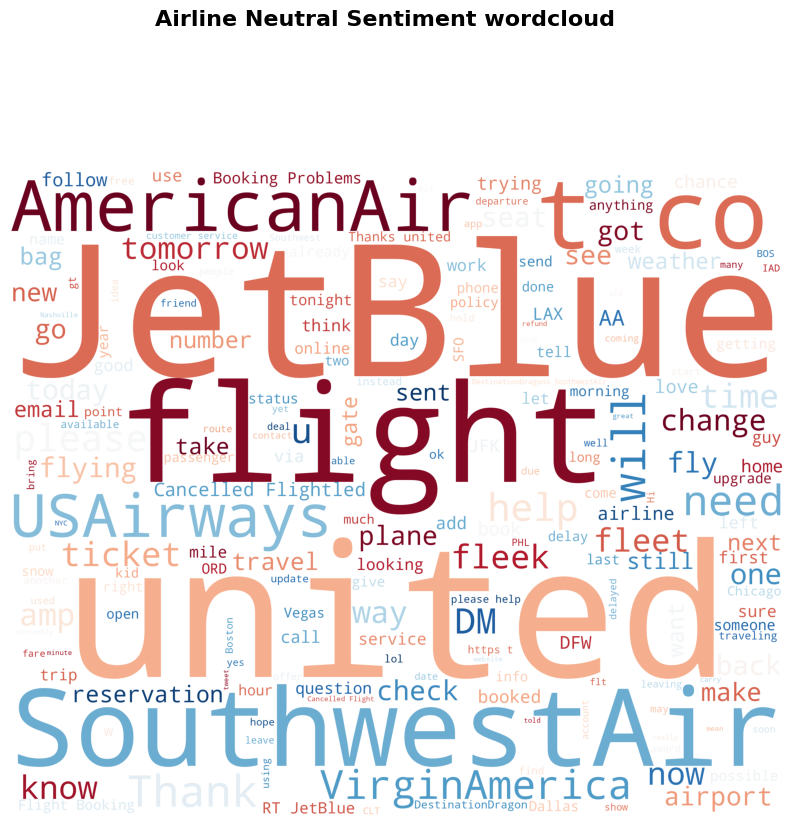

In [ ]:
plt.figure(1, figsize = (10, 10))
plt.suptitle("Airline Neutral Sentiment wordcloud", fontsize=16, fontweight='bold')
# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Other insights**

**Date related**

In [ ]:
dataw['tweet_created'] = pd.to_datetime(data["tweet_created"], format='%Y-%m-%d %H:%M:%S %z')

In [ ]:
# Extract year and month from 'tweet_created' column
dataw['year'] = dataw['tweet_created'].dt.year
dataw['month'] = dataw['tweet_created'].dt.month

In [ ]:
earliest_date = dataw['tweet_created'].min()
latest_date = dataw['tweet_created'].max()

print("Earliest date: ", earliest_date)
print("Latest date: ",latest_date)

Earliest date:  2015-02-16 23:36:05-08:00
Latest date:  2015-02-24 11:53:37-08:00


Notice that all dates are between 2015/02/16 and 2015/02/24.

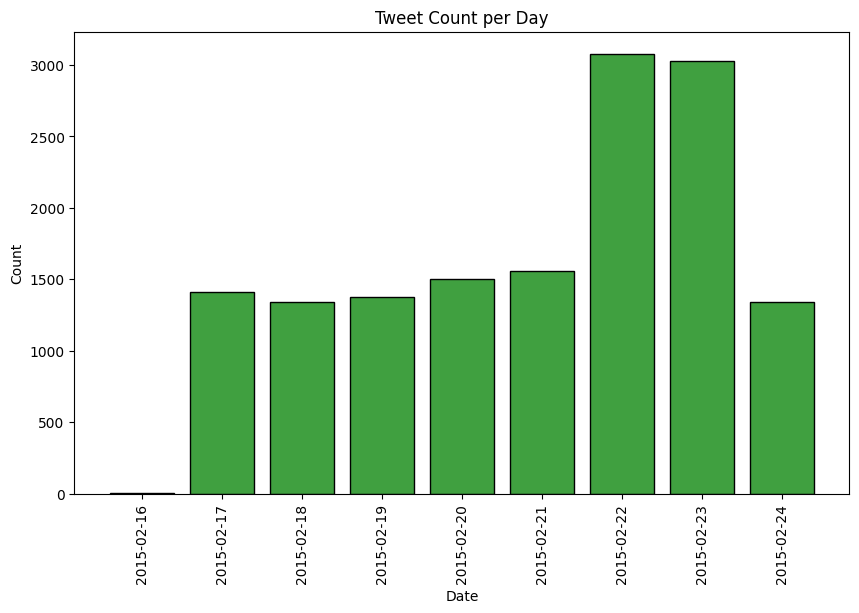

In [ ]:
#Extract day
dataw['day'] = dataw['tweet_created'].dt.date

#plot histogram
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=dataw, x='day', binwidth=1, color='green', shrink =.8)

#set the labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Tweet Count per Day')

#rotate x-axis labels for better visibility
plt.xticks(rotation=90)

#show plot
plt.show()

In [ ]:
# Group by 'day' and count the number of tweets
tweet_counts = dataw.groupby('day').size().reset_index(name='count')

# Print the table
print(tweet_counts)

          day  count
0  2015-02-16      4
1  2015-02-17   1408
2  2015-02-18   1344
3  2015-02-19   1376
4  2015-02-20   1500
5  2015-02-21   1557
6  2015-02-22   3079
7  2015-02-23   3028
8  2015-02-24   1344


The dataset only includes data from a very small range of dates. From 02/16/2015 to 02/24/2015, that is only nine days. 

During this range of dates, severe winter conditions disrupted air travel in the United States. Numerous flight cancellations and delays at airports across the country occurred. Airlines had to adjust their schedules and make accommodations for the inclement weather. Passengers faced difficulties reaching their destinations on time, and some flights were grounded altogether.





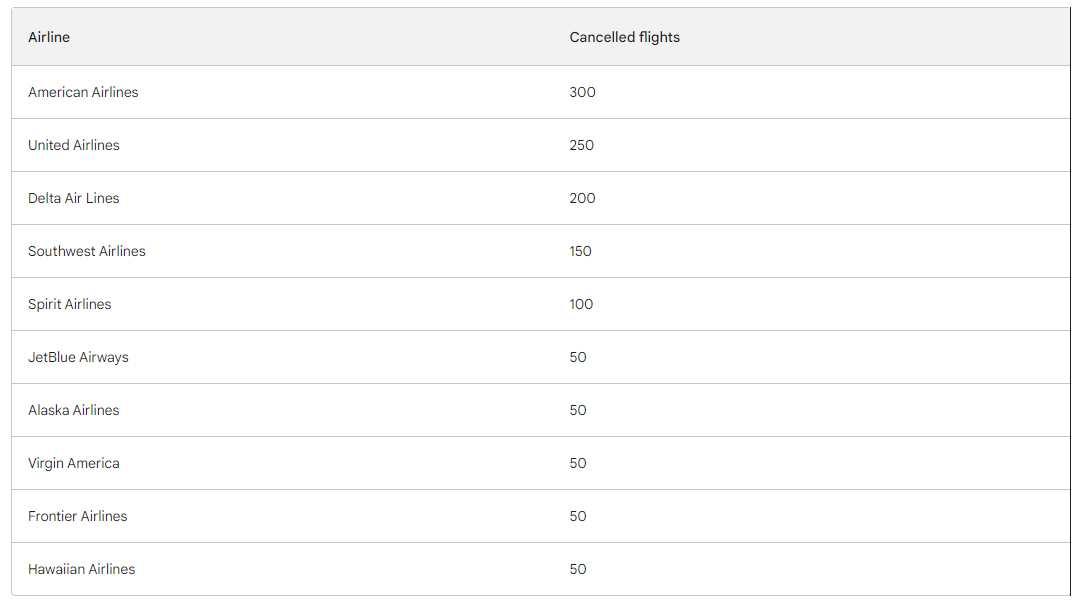

American Airlines has 300 flights cancelled, United Airlines 250, Delta Airlines 200, Southwest Airlines 150, Virgin America 50. 

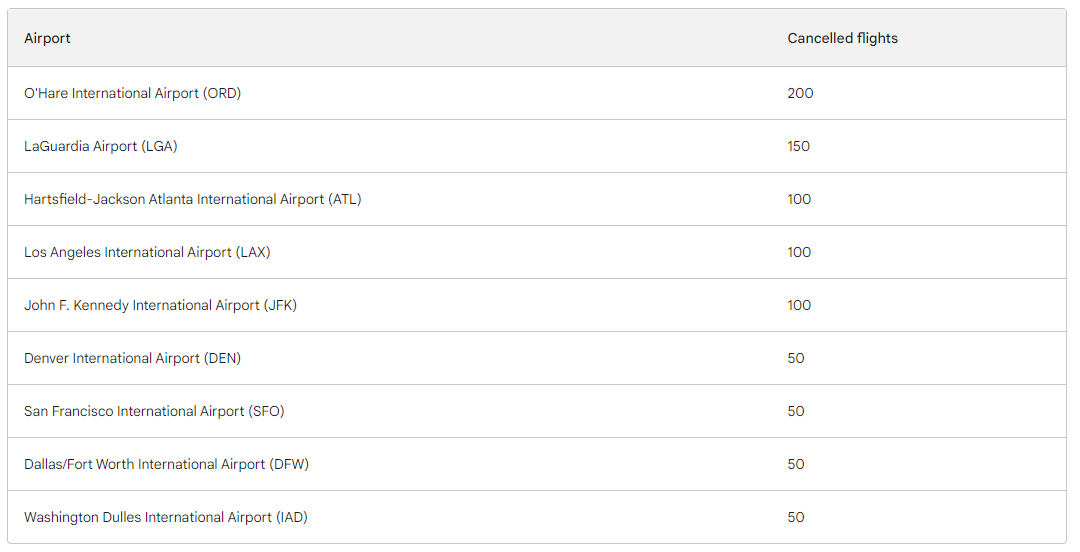

Chicago O'Hare had 200 cancelled flights, NYC La Guardia 150, Atlanta 100, LAX 100, NYC JFK 100.

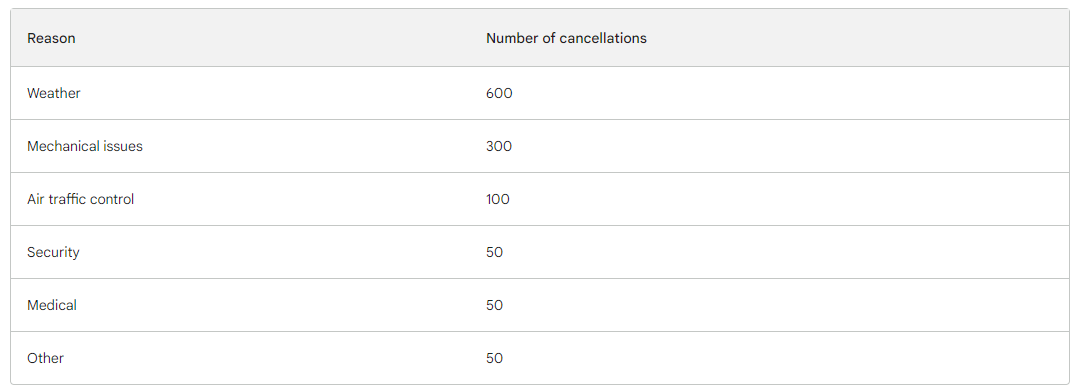

The overwhelming reason for cancellations was weather.

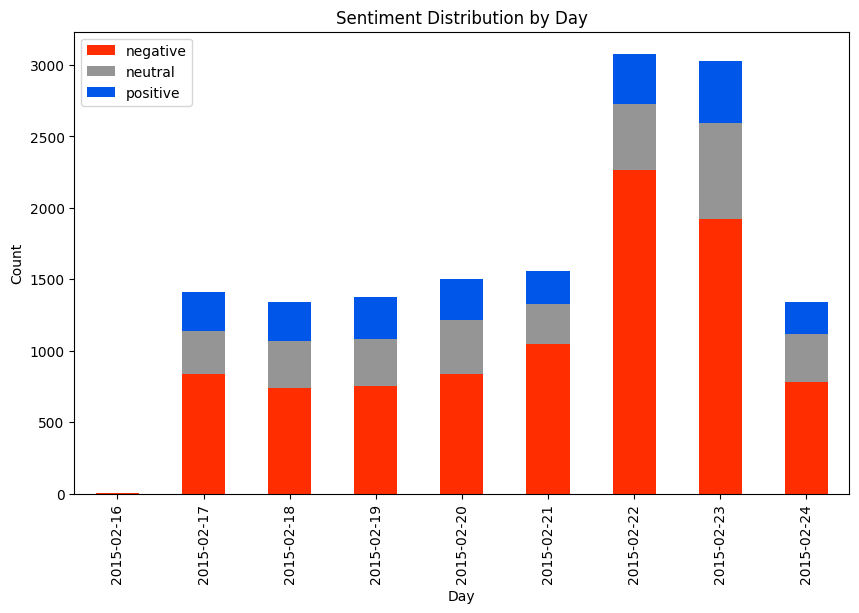

In [ ]:
# Group the data by 'day' and 'airline_sentiment'
grouped_day_data = dataw.groupby(['day', 'airline_sentiment']).size().unstack()

# Calculate the percentages for each category within each day
grouped_day_data_percentages = grouped_day_data.div(grouped_day_data.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_day_data.plot(kind='bar', stacked=True, ax=ax, color=color_dict)

# Annotate the percentages on the plot
for day in grouped_day_data.index:
    total = grouped_day_data.loc[day].sum()
    for category in grouped_day_data.columns:
        count = grouped_day_data.loc[day, category]
        percentage = grouped_day_data_percentages.loc[day, category]
        if count > 0 and not pd.isna(percentage):  # Check if count and percentage are valid
            ax.annotate(f'{percentage:.1f}%', (day, count), ha='center', va='bottom')


# Set the labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution by Day')
ax.legend()

# Show the plot
plt.show()


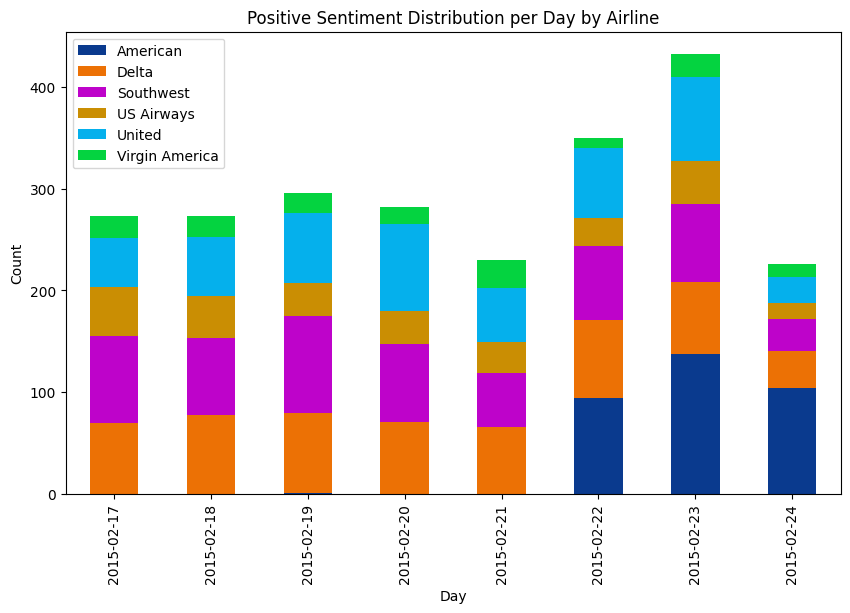

In [ ]:
#positive sentiment
positive_sent = dataw[dataw['airline_sentiment']=='positive']

# Group the data by 'day' and 'airline_sentiment'
grouped_day_airline_pos = positive_sent.groupby(['day', 'airline']).size().unstack()

# Calculate the percentages for each category within each day
grouped_day_airline_pos_percentages = grouped_day_data.div(grouped_day_airline_pos.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_day_airline_pos.plot(kind='bar', stacked=True, ax=ax, color=color_dict)

# Set the labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Count')
ax.set_title('Positive Sentiment Distribution per Day by Airline')
ax.legend()

# Show the plot
plt.show()

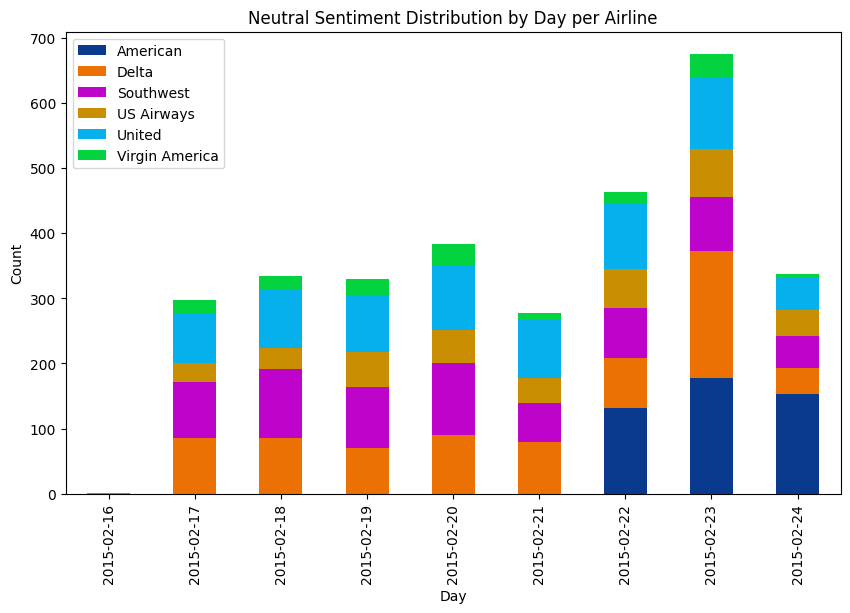

In [ ]:
#neutral sentiment
neutral_sent = dataw[dataw['airline_sentiment']=='neutral']

# Group the data by 'day' and 'airline_sentiment'
grouped_day_airline_neu = neutral_sent.groupby(['day', 'airline']).size().unstack()

# Calculate the percentages for each category within each day
grouped_day_airline_neu_percentages = grouped_day_data.div(grouped_day_airline_neu.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_day_airline_neu.plot(kind='bar', stacked=True, ax=ax, color=color_dict)

# Set the labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Count')
ax.set_title('Neutral Sentiment Distribution by Day per Airline')
ax.legend()

# Show the plot
plt.show()

**Negative Reasons**


In [ ]:
neg_reasons = dataw['negativereason'].unique()
null_neg_reasons = dataw['negativereason'].isna().sum()
neg_reasons_ct = dataw['negativereason'].value_counts()
neg_reasons_ct

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

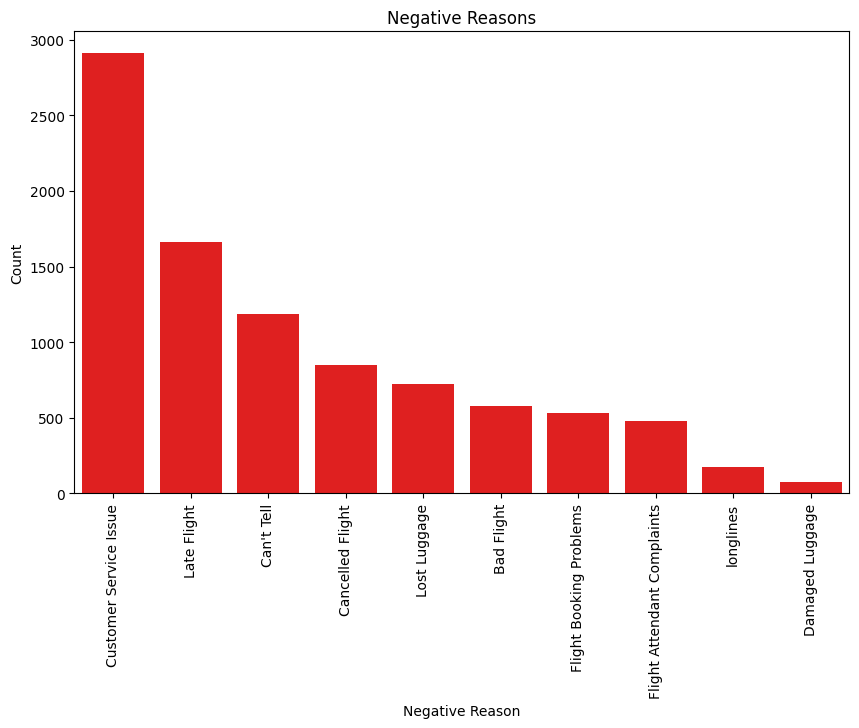

In [ ]:
#plot negative reasons
# Sort the data by count in descending order
sorted_data = dataw['negativereason'].value_counts().sort_values(ascending=False)

# Plot negative reasons
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=sorted_data.index, y=sorted_data.values, color='red')

# Set the labels and title
ax.set_xlabel('Negative Reason')
ax.set_ylabel('Count')
ax.set_title('Negative Reasons')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

plt.show()

Customer service issues are the number one reason for negative sentiments. Late flights, cancelled flights, lost luggage are other reasons. 

## **Understand of Data Columns**

**Dropping unnecessary columns**


Drop the following columns:
- tweet_id: unique id number of the tweet.
- airline_sentiment_confidence: how confident the airline sentiment is.
- negativereason: Very short reference to why the sentiment was negative.
- airline_sentiment_gold: I am not sure what this is.
- name: Name of the tweeter
- negativereason_gold: I am not sure what this is.
- retweet_count: How many times the tweet was retweeted.
- tweet_coord: geographical coordinates where the tweet originated in latitude and longitude.
- tweet_created: data and time when the tweet was created.
- tweet_location: the location where the tweeter originated the tweet.
- user_timezone: timezone where the user lives.

In [ ]:
#drop unnecessary columns
data_wdf = dataw.drop(['tweet_id','negativereason_confidence','airline_sentiment_confidence','negativereason','airline_sentiment_gold','name','negativereason_gold','retweet_count','retweet_count',
                       'tweet_coord','tweet_created','tweet_location','user_timezone', 'year','month','day'], axis=1) 


**Dropping duplicated entries**

In [ ]:
#drop duplicates, keeping last
data_nodup = data_wdf.drop_duplicates(keep='last')

In [ ]:
#check duplicates
data_nodup.duplicated().sum()

0

No duplicates.

**Rechecking data shape**

In [ ]:
#display shape after dropping duplicates, null values, and unnecessary columns.
data_nodup.shape

(14452, 3)

14,452 rows and 3 columns.

**Null Values**

In [ ]:
data_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14452 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14452 non-null  object
 1   airline            14452 non-null  object
 2   text               14452 non-null  object
dtypes: object(3)
memory usage: 451.6+ KB


There are no null values.

In [ ]:
#show head
data_nodup.head(10)

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,Virgin America,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,Virgin America,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,Virgin America,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


##**Data Pre-Processing**

Data Pre - Processing
- Pre-process the text data for classification a. Html tag removal. b. Tokenization. c. Remove the numbers. d. Removal of Special Characters and Punctuations. e. Removal of stopwords f. Conversion to lowercase. g. Lemmatize or stemming. h. Join the words in the list to convert them back to text string in the data frame. - Print the first 5 rows of data after pre-processing.

### **Data Pre-Processing**

1- Remove html tags

2- Expand contractions

3- tokenization

4- remove numbers

5- remove special characters and punctuations

6- remove stopwords

7- conversion to lowercase

8- lemmatize or stemming

9- join words in the list to convert them back to text string in the dataframe


**Remove html tags**

html tags are elements used in hypertext markup language (html) to structure and format content on web pages. Examples are: \<img>, \<ul>, \<h1>, \<table>, \<p>, \<a>, etc.

In [ ]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    text = soup.get_text()
    return text

In [ ]:
#remove html tags from text
data_nodup['text_processed_1'] = data_nodup['text'].apply(strip_html)
col_to_display = ['airline','text','text_processed_1']
subsetdf = data_nodup[col_to_display]
subsetdf.head(15)

,airline,text,text_processed_1
0,Virgin America,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.
1,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica plus you've added commercials to the experience... tacky.
2,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,Virgin America,@VirginAmerica and it's a really big bad thing about it,@VirginAmerica and it's a really big bad thing about it
5,Virgin America,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,Virgin America,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)","@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,Virgin America,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP","@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D","@virginamerica Well, I didn't…but NOW I DO! :-D"
9,Virgin America,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.","@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


**Expand Contractions**

Contractions are shortened forms of words or phrases where one or more lettes are ommited, and an apostrophe(') is used to indicate the missing letters. Examples are: can't for cannot, won't for will not, they'll for they will, I'm for I am, shouldn't for should not.

In [ ]:
#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [ ]:
#expand the contractions in text_processed_2
data_nodup['text_processed_2'] = data_nodup['text_processed_1'].apply(replace_contractions)
col_to_display = ['airline','text', 'text_processed_2']
subsetdf = data_nodup[col_to_display]
subsetdf.head(15)

,airline,text,text_processed_2
0,Virgin America,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.
1,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.,@VirginAmerica plus you have added commercials to the experience... tacky.
2,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!,@VirginAmerica I did not today... Must mean I need to take another trip!
3,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,Virgin America,@VirginAmerica and it's a really big bad thing about it,@VirginAmerica and it is a really big bad thing about it
5,Virgin America,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,@VirginAmerica seriously would pay $30 a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA
6,Virgin America,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)","@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away :)"
7,Virgin America,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP","@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D","@virginamerica Well, I did not…but NOW I DO! :-D"
9,Virgin America,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.","@VirginAmerica it was amazing, and arrived an hour early. You are too good to me."


**Tokenization**

In [ ]:
# Apply tokenization to 'text_processed_2' using word_tokenize from the nltk library
data_nodup['text_processed_3'] = data_nodup['text_processed_2'].apply(word_tokenize)
col_to_display = ['airline','text_processed_2', 'text_processed_3']
subsetdf = data_nodup[col_to_display]
subsetdf.head(15)

,airline,text_processed_2,text_processed_3
0,Virgin America,@VirginAmerica What @dhepburn said.,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,Virgin America,@VirginAmerica plus you have added commercials to the experience... tacky.,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,Virgin America,@VirginAmerica I did not today... Must mean I need to take another trip!,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,Virgin America,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse","[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,Virgin America,@VirginAmerica and it is a really big bad thing about it,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
5,Virgin America,@VirginAmerica seriously would pay $30 a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA,"[@, VirginAmerica, seriously, would, pay, $, 30, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]"
6,Virgin America,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away :)","[@, VirginAmerica, yes, ,, nearly, every, time, I, fly, VX, this, “, ear, worm, ”, will, not, go, away, :, )]"
7,Virgin America,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP","[@, VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, ,, there, ., https, :, //t.co/mWpG7grEZP]"
8,Virgin America,"@virginamerica Well, I did not…but NOW I DO! :-D","[@, virginamerica, Well, ,, I, did, not…but, NOW, I, DO, !, :, -D]"
9,Virgin America,"@VirginAmerica it was amazing, and arrived an hour early. You are too good to me.","[@, VirginAmerica, it, was, amazing, ,, and, arrived, an, hour, early, ., You, are, too, good, to, me, .]"


**Remove the Numbers**

In [ ]:
#remove the numericals present from the set of tokens

def remove_numbers(words):
    """Remove numerical values from a list of tokens"""
    new_words = []
    for word in words:
        new_word = re.sub(r'\d+', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


In [ ]:
# Remove numerical values from the tokenized text
data_nodup['text_processed_4'] = data_nodup['text_processed_3'].apply(remove_numbers)

# Select the columns to display
col_to_display = ['airline', 'text_processed_3', 'text_processed_4']

# Create a subset dataframe with selected columns
subsetdf = data_nodup[col_to_display]

subsetdf.head(15)


,airline,text_processed_3,text_processed_4
0,Virgin America,"[@, VirginAmerica, What, @, dhepburn, said, .]","[@, VirginAmerica, What, @, dhepburn, said, .]"
1,Virgin America,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]","[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,Virgin America,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]","[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,Virgin America,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]","[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,Virgin America,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]","[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
5,Virgin America,"[@, VirginAmerica, seriously, would, pay, $, 30, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]","[@, VirginAmerica, seriously, would, pay, $, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]"
6,Virgin America,"[@, VirginAmerica, yes, ,, nearly, every, time, I, fly, VX, this, “, ear, worm, ”, will, not, go, away, :, )]","[@, VirginAmerica, yes, ,, nearly, every, time, I, fly, VX, this, “, ear, worm, ”, will, not, go, away, :, )]"
7,Virgin America,"[@, VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, ,, there, ., https, :, //t.co/mWpG7grEZP]","[@, VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, ,, there, ., https, :, //t.co/mWpGgrEZP]"
8,Virgin America,"[@, virginamerica, Well, ,, I, did, not…but, NOW, I, DO, !, :, -D]","[@, virginamerica, Well, ,, I, did, not…but, NOW, I, DO, !, :, -D]"
9,Virgin America,"[@, VirginAmerica, it, was, amazing, ,, and, arrived, an, hour, early, ., You, are, too, good, to, me, .]","[@, VirginAmerica, it, was, amazing, ,, and, arrived, an, hour, early, ., You, are, too, good, to, me, .]"


**Remove Special Characters**

In [ ]:
#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# Remove special characters from text
data_nodup['text_processed_5'] = data_nodup['text_processed_4'].apply(remove_non_ascii)

# Select the columns to display
col_to_display = ['airline', 'text_processed_4', 'text_processed_5']

# Create a subset dataframe with selected columns
subsetdf = data_nodup[col_to_display]

subsetdf.head(15)

,airline,text_processed_4,text_processed_5
0,Virgin America,"[@, VirginAmerica, What, @, dhepburn, said, .]","[@, VirginAmerica, What, @, dhepburn, said, .]"
1,Virgin America,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]","[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,Virgin America,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]","[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,Virgin America,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]","[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,Virgin America,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]","[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
5,Virgin America,"[@, VirginAmerica, seriously, would, pay, $, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]","[@, VirginAmerica, seriously, would, pay, $, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]"
6,Virgin America,"[@, VirginAmerica, yes, ,, nearly, every, time, I, fly, VX, this, “, ear, worm, ”, will, not, go, away, :, )]","[@, VirginAmerica, yes, ,, nearly, every, time, I, fly, VX, this, , ear, worm, , will, not, go, away, :, )]"
7,Virgin America,"[@, VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, ,, there, ., https, :, //t.co/mWpGgrEZP]","[@, VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, ,, there, ., https, :, //t.co/mWpGgrEZP]"
8,Virgin America,"[@, virginamerica, Well, ,, I, did, not…but, NOW, I, DO, !, :, -D]","[@, virginamerica, Well, ,, I, did, not...but, NOW, I, DO, !, :, -D]"
9,Virgin America,"[@, VirginAmerica, it, was, amazing, ,, and, arrived, an, hour, early, ., You, are, too, good, to, me, .]","[@, VirginAmerica, it, was, amazing, ,, and, arrived, an, hour, early, ., You, are, too, good, to, me, .]"


**Remove Punctuations**

In [ ]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [ ]:
# Remove punctuations from text
data_nodup['text_processed_6'] = data_nodup['text_processed_5'].apply(remove_punctuation)

# Select the columns to display
col_to_display = ['airline', 'text_processed_5', 'text_processed_6']

# Create a subset dataframe with selected columns
subsetdf = data_nodup[col_to_display]

subsetdf.head(15)

,airline,text_processed_5,text_processed_6
0,Virgin America,"[@, VirginAmerica, What, @, dhepburn, said, .]","[VirginAmerica, What, dhepburn, said]"
1,Virgin America,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]","[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,Virgin America,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]","[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,Virgin America,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]","[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,Virgin America,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]","[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
5,Virgin America,"[@, VirginAmerica, seriously, would, pay, $, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]","[VirginAmerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, VA]"
6,Virgin America,"[@, VirginAmerica, yes, ,, nearly, every, time, I, fly, VX, this, , ear, worm, , will, not, go, away, :, )]","[VirginAmerica, yes, nearly, every, time, I, fly, VX, this, ear, worm, will, not, go, away]"
7,Virgin America,"[@, VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, ,, there, ., https, :, //t.co/mWpGgrEZP]","[VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, there, https, tcomWpGgrEZP]"
8,Virgin America,"[@, virginamerica, Well, ,, I, did, not...but, NOW, I, DO, !, :, -D]","[virginamerica, Well, I, did, notbut, NOW, I, DO, D]"
9,Virgin America,"[@, VirginAmerica, it, was, amazing, ,, and, arrived, an, hour, early, ., You, are, too, good, to, me, .]","[VirginAmerica, it, was, amazing, and, arrived, an, hour, early, You, are, too, good, to, me]"


**Remove extra spaces if any**

In [ ]:
#remove extra espaces if any
def remove_extra_spaces(words):
    """Remove extra spaces from a list of words"""
    text = ' '.join(words)  # Join the words into a single string
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.split()  # Split the string back into a list of words

In [ ]:
# Remove extra spaces from text
data_nodup['text_processed_7'] = data_nodup['text_processed_6'].apply(remove_extra_spaces)

# Select the columns to display
col_to_display = ['airline', 'text_processed_6', 'text_processed_7']

# Create a subset dataframe with selected columns
subsetdf = data_nodup[col_to_display]

subsetdf.head(15)

,airline,text_processed_6,text_processed_7
0,Virgin America,"[VirginAmerica, What, dhepburn, said]","[VirginAmerica, What, dhepburn, said]"
1,Virgin America,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]","[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,Virgin America,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]","[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,Virgin America,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]","[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,Virgin America,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]","[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
5,Virgin America,"[VirginAmerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, VA]","[VirginAmerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, VA]"
6,Virgin America,"[VirginAmerica, yes, nearly, every, time, I, fly, VX, this, ear, worm, will, not, go, away]","[VirginAmerica, yes, nearly, every, time, I, fly, VX, this, ear, worm, will, not, go, away]"
7,Virgin America,"[VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, there, https, tcomWpGgrEZP]","[VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, there, https, tcomWpGgrEZP]"
8,Virgin America,"[virginamerica, Well, I, did, notbut, NOW, I, DO, D]","[virginamerica, Well, I, did, notbut, NOW, I, DO, D]"
9,Virgin America,"[VirginAmerica, it, was, amazing, and, arrived, an, hour, early, You, are, too, good, to, me]","[VirginAmerica, it, was, amazing, and, arrived, an, hour, early, You, are, too, good, to, me]"


**Conversion to lowercase**

Lets convert to lowercase before we remove stopwords

In [ ]:

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [ ]:
# convert to lowercase
data_nodup['text_processed_8'] = data_nodup['text_processed_7'].apply(to_lowercase)

# Select the columns to display
col_to_display = ['airline', 'text_processed_7', 'text_processed_8']

# Create a subset dataframe with selected columns
subsetdf = data_nodup[col_to_display]

subsetdf.head(15)

,airline,text_processed_7,text_processed_8
0,Virgin America,"[VirginAmerica, What, dhepburn, said]","[virginamerica, what, dhepburn, said]"
1,Virgin America,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]","[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,Virgin America,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]","[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]"
3,Virgin America,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]","[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,Virgin America,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]","[virginamerica, and, it, is, a, really, big, bad, thing, about, it]"
5,Virgin America,"[VirginAmerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, VA]","[virginamerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, va]"
6,Virgin America,"[VirginAmerica, yes, nearly, every, time, I, fly, VX, this, ear, worm, will, not, go, away]","[virginamerica, yes, nearly, every, time, i, fly, vx, this, ear, worm, will, not, go, away]"
7,Virgin America,"[VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, there, https, tcomWpGgrEZP]","[virginamerica, really, missed, a, prime, opportunity, for, men, without, hats, parody, there, https, tcomwpggrezp]"
8,Virgin America,"[virginamerica, Well, I, did, notbut, NOW, I, DO, D]","[virginamerica, well, i, did, notbut, now, i, do, d]"
9,Virgin America,"[VirginAmerica, it, was, amazing, and, arrived, an, hour, early, You, are, too, good, to, me]","[virginamerica, it, was, amazing, and, arrived, an, hour, early, you, are, too, good, to, me]"


**Removal of stopwords**

In [ ]:
# Get English stopwords
stopwords = stopwords.words('english')

In [ ]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:


# Remove stopwords from the tokenized text
def remove_stopwords(words):
    """Remove stopwords from list of tokenized words"""
    return [word for word in words if word not in stopwords]

# Remove stopwords from the text_processed_8 column
data_nodup['text_processed_9'] = data_nodup['text_processed_8'].apply(remove_stopwords)

# Select the columns to display
col_to_display = ['airline', 'text_processed_8', 'text_processed_9']

# Create a subset dataframe with selected columns
subsetdf = data_nodup[col_to_display]

subsetdf.head(15)

,airline,text_processed_8,text_processed_9
0,Virgin America,"[virginamerica, what, dhepburn, said]","[virginamerica, dhepburn, said]"
1,Virgin America,"[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]","[virginamerica, plus, added, commercials, experience, tacky]"
2,Virgin America,"[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]","[virginamerica, today, must, mean, need, take, another, trip]"
3,Virgin America,"[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]","[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]"
4,Virgin America,"[virginamerica, and, it, is, a, really, big, bad, thing, about, it]","[virginamerica, really, big, bad, thing]"
5,Virgin America,"[virginamerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, va]","[virginamerica, seriously, would, pay, flight, seats, playing, really, bad, thing, flying, va]"
6,Virgin America,"[virginamerica, yes, nearly, every, time, i, fly, vx, this, ear, worm, will, not, go, away]","[virginamerica, yes, nearly, every, time, fly, vx, ear, worm, go, away]"
7,Virgin America,"[virginamerica, really, missed, a, prime, opportunity, for, men, without, hats, parody, there, https, tcomwpggrezp]","[virginamerica, really, missed, prime, opportunity, men, without, hats, parody, https, tcomwpggrezp]"
8,Virgin America,"[virginamerica, well, i, did, notbut, now, i, do, d]","[virginamerica, well, notbut]"
9,Virgin America,"[virginamerica, it, was, amazing, and, arrived, an, hour, early, you, are, too, good, to, me]","[virginamerica, amazing, arrived, hour, early, good]"


**Lemmatize or stemming**

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

In [ ]:
# apply lemmatization
data_nodup['text_processed_10'] = data_nodup['text_processed_9'].apply(lemmatize_list)

# Select the columns to display
col_to_display = ['airline', 'text_processed_9', 'text_processed_10']

# Create a subset dataframe with selected columns
subsetdf = data_nodup[col_to_display]

subsetdf.head(15)

,airline,text_processed_9,text_processed_10
0,Virgin America,"[virginamerica, dhepburn, said]","[virginamerica, dhepburn, said]"
1,Virgin America,"[virginamerica, plus, added, commercials, experience, tacky]","[virginamerica, plus, added, commercial, experience, tacky]"
2,Virgin America,"[virginamerica, today, must, mean, need, take, another, trip]","[virginamerica, today, must, mean, need, take, another, trip]"
3,Virgin America,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]","[virginamerica, really, aggressive, blast, obnoxious, entertainment, guest, face, little, recourse]"
4,Virgin America,"[virginamerica, really, big, bad, thing]","[virginamerica, really, big, bad, thing]"
5,Virgin America,"[virginamerica, seriously, would, pay, flight, seats, playing, really, bad, thing, flying, va]","[virginamerica, seriously, would, pay, flight, seat, playing, really, bad, thing, flying, va]"
6,Virgin America,"[virginamerica, yes, nearly, every, time, fly, vx, ear, worm, go, away]","[virginamerica, yes, nearly, every, time, fly, vx, ear, worm, go, away]"
7,Virgin America,"[virginamerica, really, missed, prime, opportunity, men, without, hats, parody, https, tcomwpggrezp]","[virginamerica, really, missed, prime, opportunity, men, without, hat, parody, http, tcomwpggrezp]"
8,Virgin America,"[virginamerica, well, notbut]","[virginamerica, well, notbut]"
9,Virgin America,"[virginamerica, amazing, arrived, hour, early, good]","[virginamerica, amazing, arrived, hour, early, good]"


**Join words in the list**

In [ ]:
#join words in a list
def join_words(words):
    """Join the words in a list to convert them back to a text string"""
    return ' '.join(words)

In [ ]:
# Join words in a list
data_nodup['text_processed_11'] = data_nodup['text_processed_10'].apply(join_words)

# Select the columns to display
col_to_display = ['airline', 'text_processed_10', 'text_processed_11']

# Create a subset dataframe with selected columns
subsetdf = data_nodup[col_to_display]

subsetdf.head(15)

,airline,text_processed_10,text_processed_11
0,Virgin America,"[virginamerica, dhepburn, said]",virginamerica dhepburn said
1,Virgin America,"[virginamerica, plus, added, commercial, experience, tacky]",virginamerica plus added commercial experience tacky
2,Virgin America,"[virginamerica, today, must, mean, need, take, another, trip]",virginamerica today must mean need take another trip
3,Virgin America,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guest, face, little, recourse]",virginamerica really aggressive blast obnoxious entertainment guest face little recourse
4,Virgin America,"[virginamerica, really, big, bad, thing]",virginamerica really big bad thing
5,Virgin America,"[virginamerica, seriously, would, pay, flight, seat, playing, really, bad, thing, flying, va]",virginamerica seriously would pay flight seat playing really bad thing flying va
6,Virgin America,"[virginamerica, yes, nearly, every, time, fly, vx, ear, worm, go, away]",virginamerica yes nearly every time fly vx ear worm go away
7,Virgin America,"[virginamerica, really, missed, prime, opportunity, men, without, hat, parody, http, tcomwpggrezp]",virginamerica really missed prime opportunity men without hat parody http tcomwpggrezp
8,Virgin America,"[virginamerica, well, notbut]",virginamerica well notbut
9,Virgin America,"[virginamerica, amazing, arrived, hour, early, good]",virginamerica amazing arrived hour early good


In [ ]:
#now lets copy the dataframe
dataProcessed_df = data_nodup.copy() 

#drop the text_original, text, and all text_processed_nn columns but the last one: text_processed_11
columns_to_drop = ['text_processed_1','text_processed_2','text_processed_3','text_processed_4','text_processed_5','text_processed_6','text_processed_7',
                    'text_processed_8','text_processed_9','text_processed_10','text']

dataProcessed_df.drop(columns=columns_to_drop, inplace=True)
dataProcessed_df.rename(columns={'text_processed_11':'text'}, inplace=True)

In [ ]:
dataProcessed_df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,virginamerica dhepburn said
1,positive,Virgin America,virginamerica plus added commercial experience tacky
2,neutral,Virgin America,virginamerica today must mean need take another trip
3,negative,Virgin America,virginamerica really aggressive blast obnoxious entertainment guest face little recourse
4,negative,Virgin America,virginamerica really big bad thing


**Run wordcloud again after data preprocessing**



**Negative Feeling**

In [ ]:
#create a dataframe of only positive sentiments
negative_reasons = dataProcessed_df[dataProcessed_df['airline_sentiment']=='negative']

##join negative reviews using a separator
words = ' '.join(negative_reasons['text'])

#remove the \n characters from words
cleaned_words = ' '.join([word for word in words.split()])

In [ ]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_words) # The generate() function takes one argument of the text we created, helps to generate the wordclouds

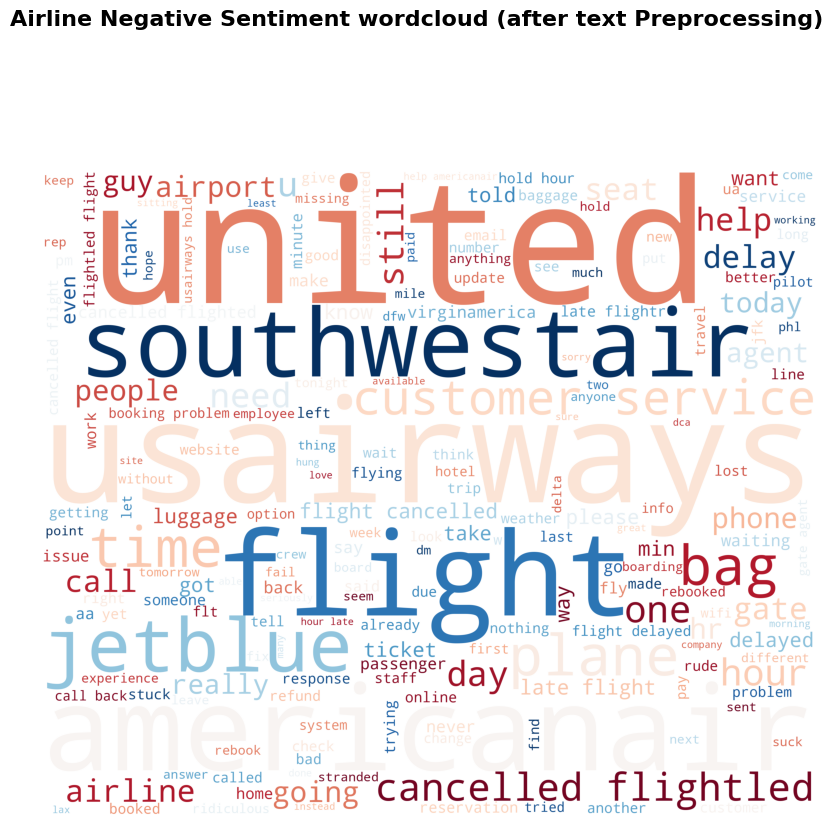

In [ ]:
plt.figure(1, figsize = (10, 10))
plt.suptitle("Airline Negative Sentiment wordcloud (after text Preprocessing)", fontsize=16, fontweight='bold')
# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Notice the common words include United, AmericanAir, flight, USAirways, customer service, bag, hour, cancelled flight, delay, still, jetblue, day, help, airline.

**Neutral Feeling**

In [ ]:
#create a dataframe of only positive sentiments
neutral_reasons = dataProcessed_df[dataProcessed_df['airline_sentiment']=='neutral']

##join negative reviews using a separator
words = ' '.join(neutral_reasons['text'])

#remove the \n characters from words
cleaned_words = ' '.join([word for word in words.split()])

In [ ]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_words) # The generate() function takes one argument of the text we created, helps to generate the wordclouds

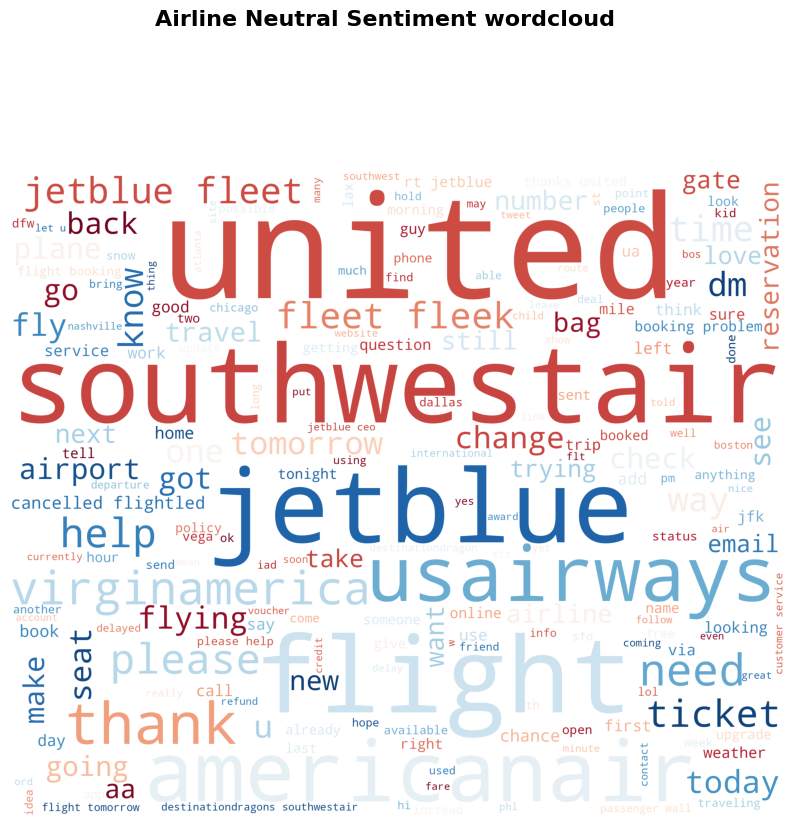

In [ ]:
plt.figure(1, figsize = (10, 10))
plt.suptitle("Airline Neutral Sentiment wordcloud", fontsize=16, fontweight='bold')
# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Common words include United, soutwestair, jetblue, usairways, thank, need, ticket, help, today.

**Positve Feeling**

In [ ]:
#create a dataframe of only positive sentiments
positive_reasons = dataProcessed_df[dataProcessed_df['airline_sentiment']=='positive']

##join negative reviews using a separator
words = ' '.join(positive_reasons['text'])

#remove the \n characters from words
cleaned_words = ' '.join([word for word in words.split()])

In [ ]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_words) # The generate() function takes one argument of the text we created, helps to generate the wordclouds

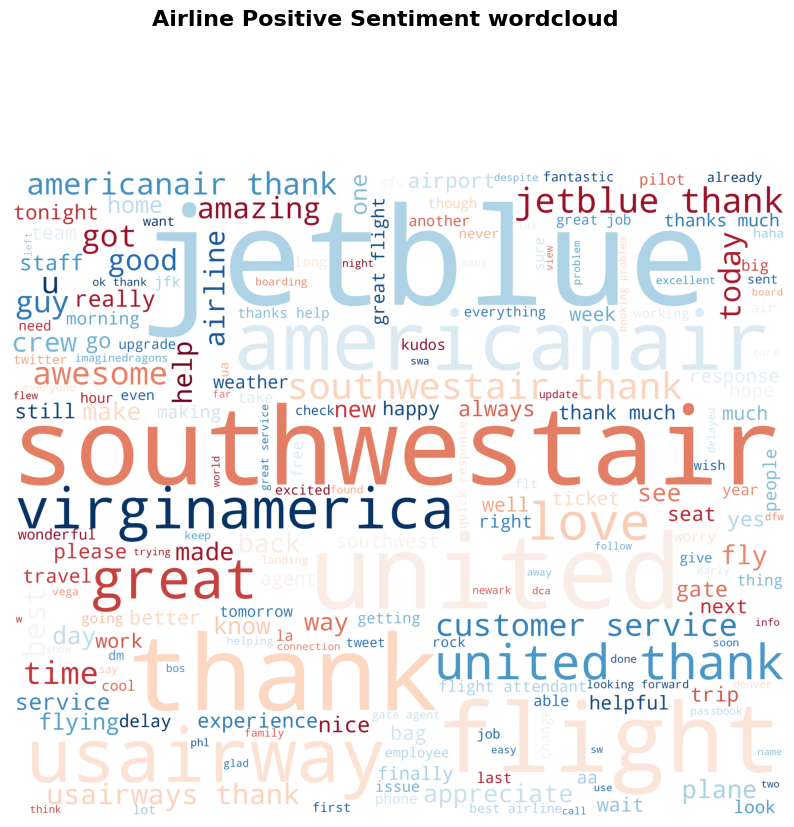

In [ ]:
plt.figure(1, figsize = (10, 10))
plt.suptitle("Airline Positive Sentiment wordcloud", fontsize=16, fontweight='bold')
# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Common words are southwestair, jetblue, thank, usairway, great.

##**Text Vectorization**

Text Vectorization
a. Use CountVectorizer. b. Use TfidfVectorizer. Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model.

**CountVectorizer (Bag of Words)**

In [ ]:
# Keep only 100 features as number of features will increase the processing time.
Count_vec = CountVectorizer(max_features = 1000)  

data_features_bow = Count_vec.fit_transform(dataProcessed_df['text'])

# Convert the data features to array
data_features_bow = data_features_bow.toarray()  

In [ ]:
# Shape of the feature vector
data_features_bow.shape 

(14452, 1000)

**TF-IDF (Term Frequency - Inverse Document Frequency)**

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 1000)

data_features_tfidf = tfidf_vect.fit_transform(dataProcessed_df['text'])

data_features_tfidf = data_features_tfidf.toarray()

# Feature shape
data_features_tfidf.shape  

(14452, 1000)

##**Model Building and Evaluation**

####**CountVectorizer (BagOfWords)**

In [ ]:
#specify labels 
X = data_features_bow

y = dataProcessed_df.airline_sentiment

In [ ]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      2617
     neutral       0.48      0.44      0.46       565
    positive       0.63      0.61      0.62       431

    accuracy                           0.78      3613
   macro avg       0.66      0.64      0.65      3613
weighted avg       0.77      0.78      0.77      3613



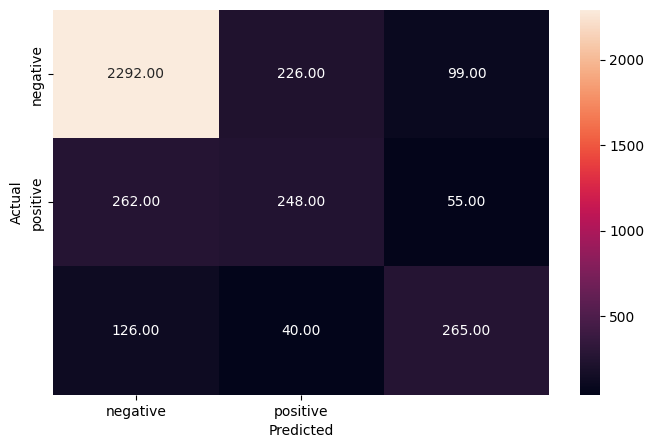

In [ ]:
# Training the best model and calculating accuracy on test data 

clf1 = RandomForestClassifier(n_estimators = 100)

clf1.fit(X_train, y_train)

y_pred_test1 = clf1.predict(X_test)

metrics_score(y_test, y_pred_test1)

Notice the following from the multiclass metrics score:
1. Negative
- Precision: 86%
- Recall: 88%
- F1-score: 87%

2. Neutral
- Precision: 48%
- Recall: 44%
- F1-score: 46%

3. Positive
- Precision: 63%
- Recall: 61%
- F1-score: 62%

4. Oveall accuracy: 78%

5. Macro-averaged F1-score: 65%


The overall accuracy of the model is 0.78, indicating that 78% of the instances in the test set were correctly classified.

The macro-averaged F1-score, which provides an equal weight to each class, is 0.65. The weighted average F1-score, which accounts for class imbalance, is 0.77.

Based on these results, the model performs relatively well for the "negative" class with high precision, recall, and F1-score. However, it has lower performance for the "neutral" class, with lower precision, recall, and F1-score. The "positive" class falls somewhere in between.

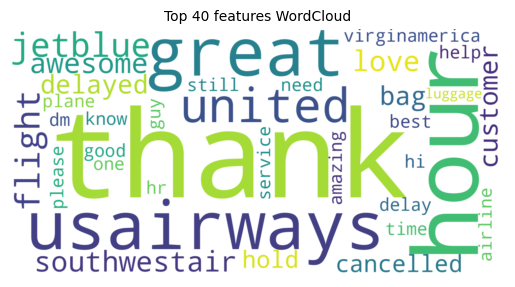

In [ ]:
#Instantiate the feature from the vectorizer
features_bow = Count_vec.get_feature_names_out()

get_top40_words(clf1,features_bow)

Notice the top 40 most common words from the wordcloud include thank, usairways, awesome, great, hour, united, flight, jetblue, awesome, cancelled, southwestair.

What's the deal with jetblue? Since Jetblue isn't one of the airlines in our dataset. However, this is most likely references to the airline (i.e. "I will fly JetBlue next time", "JetBlue is better", "JetBlue is worse", etc).

In [443]:
feature_bow_counts = data_features_bow.sum(axis=0)
feature_bow_dict = dict(zip(features_bow, feature_bow_counts))
sorted_features_bow = sorted(feature_bow_dict.items(), key=lambda x: x[1], reverse=True)

for feature, count in sorted_features_bow[:40]:
    print(feature)

flight
united
usairways
americanair
southwestair
jetblue
get
http
hour
thanks
cancelled
service
time
customer
help
bag
would
plane
hold
need
thank
one
still
day
please
call
airline
gate
delayed
virginamerica
back
flightled
seat
got
phone
delay
like
today
hr
late


flight, united, usairways, southwestair, jetblue are the top 5 words.

###**TFID Vectorizer**

In [ ]:
X = data_features_tfidf

y = dataProcessed_df.airline_sentiment

In [ ]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

              precision    recall  f1-score   support

    negative       0.81      0.95      0.87      2617
     neutral       0.57      0.19      0.28       565
    positive       0.69      0.55      0.61       431

    accuracy                           0.78      3613
   macro avg       0.69      0.56      0.59      3613
weighted avg       0.76      0.78      0.75      3613



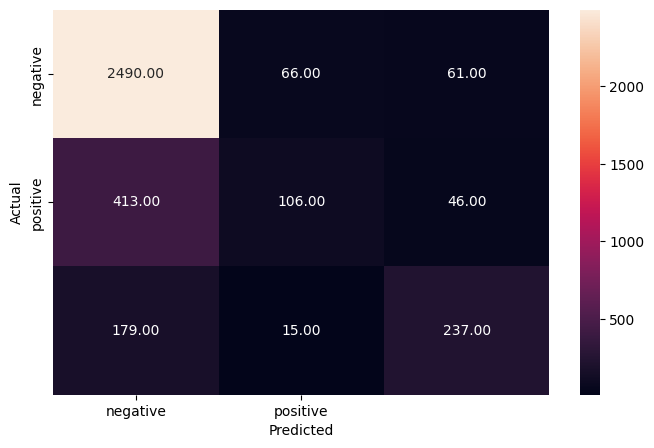

In [ ]:
# Training the best model and calculating accuracy on test data 

clf2 = RandomForestClassifier(n_estimators = 100)

clf2.fit(X_train, y_train)

y_pred_test2 = clf2.predict(X_test)

metrics_score(y_test, y_pred_test2)

1. Negative class:
- Precision: 81%
- Recall: 95%
- F1-score: 87%

2. Neutral class:
- Precision: 57%
- Recall: 19%
- F1-score: 28%

3.Positive class:
- Precision: 0.69%
- Recall: 0.55%
- F1-score: 61%

The overall accuracy of the model is 78%. 

The macro-average F1-score is 59%, and the weighted-average F1-score is 75%.

The performance of the above model can be considered good in terms of overall accuracy, as it achieves an accuracy of 0.78, which means it correctly predicts the sentiment class for 78% of the instances in the test set.

However, when considering the individual classes, the model shows varying performance. The negative class has the highest precision, recall, and F1-score, indicating that the model is able to accurately predict negative sentiment tweets. On the other hand, the neutral class has lower precision, recall, and F1-score, suggesting that the model struggles to correctly classify neutral sentiment tweets. The positive class has moderate precision, recall, and F1-score, indicating reasonably good performance in predicting positive sentiment tweets.

Overall, the model's performance is acceptable, but there is room for improvement, especially in correctly classifying neutral sentiment tweets. Depending on the specific requirements and goals of the application, further analysis and fine-tuning of the model may be necessary.

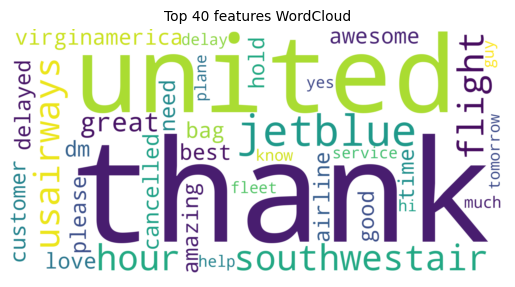

In [ ]:
#Instantiate the feature from the vectorizer    
features_tfidf = tfidf_vect.get_feature_names_out()  

get_top40_words(clf2,features_tfidf)

the most common words are united, thank, southwestair, hour, jetblue, awesome, flight.

In [442]:
feature_tfidf_counts = data_features_tfidf.sum(axis=0)
feature_tfidf_dict = dict(zip(features_tfidf, feature_tfidf_counts))
sorted_features_tfidf = sorted(feature_tfidf_dict.items(), key=lambda x: x[1], reverse=True)

for feature, count in sorted_features_tfidf[:40]:
    print(feature)

united
flight
jetblue
usairways
americanair
southwestair
http
thanks
get
hour
service
cancelled
customer
thank
time
help
bag
would
plane
virginamerica
hold
need
please
airline
still
one
day
call
delayed
gate
back
flightled
got
guy
delay
like
seat
phone
today
know


The above is a list of the top 40 words being United the most common. This time, Jetblue is the third most common word.

##**Summary**

###**Comparison of Results**

In [444]:
#convert the test samples into a dataframe where the columns are

#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),
#Count Vectorizer model predicted labels(count_vectorizer_predicted)

df = pd.DataFrame(y_test.tolist(), columns = ['y_test'])

df['count_vectorizer_predicted'] = y_pred_test1

df['tf_idf_predicted'] = y_pred_test2

df.head(30)

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,negative,negative,negative
1,positive,positive,positive
2,negative,negative,negative
3,positive,negative,negative
4,negative,negative,negative
5,negative,negative,negative
6,neutral,negative,negative
7,negative,negative,negative
8,neutral,positive,positive
9,negative,negative,negative


The TF-IDF model performs better overall compared to the CountVectorizer model.

The TF-IDF model achieves higher precision, recall, and F1-score for the neutral class, which had relatively lower performance in the CountVectorizer model. This indicates that the TF-IDF model is better at correctly predicting instances with a neutral sentiment.

Additionally, the TF-IDF model has a slightly higher macro average F1-score, which takes into account the overall performance across all classes.

However, it's important to note that the TF-IDF model performs slightly lower in terms of precision and recall for the negative and positive classes compared to the CountVectorizer model.

The first step is to Pre-process the data. This is an essential part of NLP.

1. EAD
In the EAD we gathered essential information regarding the dataset. We found out for instance that most of the columns in the dataset could be dropped. We also noticed that there were only a handful of duplicated and null values. Other information collected was that the dataset only included 6 airlines and that the tweets were made during a span of only 9 days. 

We also inferred from the dataset that some airlines had overwhelmingly negative sentiments when compared to other airlines. We noticed that US Airways, United, and American, overall had more negative sentiment than the other airlines in the dataset. However, we should keep in mind that United and American are very large airlines. It called our attention that USAirways (now merged with American) being smaller than the other airlines, seemed to have the most negative sentiment.  Delta being the second largest airline, actually did better than most.

2. Preprocess the data.
First, we dropped duplicates, nulls, and dropped unnecessary features. 
After that, the dataset, was transformed by following pre-processing steps to clean and transform it into a suitable, more efficient format for analysis. 
We first removed html tags, expanded contractions, applied tokenization, removed numerical values, removed non-ASCII characters, removed punctuation, removed stopwords (using nltk stopwords), applied lemmatization, and also removed extra spaces.

3. Vectorization.
We converted the text feature into numerical feature vectors using the CountVectorizer and TF-IFDF. 
The vectorization technique transformed the text data into a matrix where each row represented a document and each column represented a unique word in the corpus. 

CountVectorizer counts the occurrences of words in each document, TF-IDF considers the relative importance of a word in a document compared to its occurrence in the entire corpus. TF-IDF can be more effective in capturing the distinguishing characteristics of documents by giving higher weights to terms that are both frequent in the document and rare in the corpus.

This is very important to remember:

A. CountVectorizer:
- CountVectorizer converts a collection of text documents into a matrix of token counts.
- It creates a feature vector for each document, where each element in the vector represents the count of a specific word (term) in the document.
- It considers the frequency of terms in the document but does not consider their importance in the overall corpus.
- It gives equal importance to all words and assigns a numerical value based on their count in each document.

B. TF-IDF:

- TF-IDF stands for Term Frequency-Inverse Document Frequency.
- It calculates the importance of a term in a document relative to the entire corpus.
- TF-IDF combines term frequency (TF), which measures the frequency of a term in a document, and inverse document frequency (IDF), which measures the rarity of a term in the entire corpus.
- TF-IDF assigns a higher weight to terms that are frequent in a specific document but rare in the entire corpus.
- It helps in identifying important terms that are distinctive to a document.
- It reduces the importance of common words that appear frequently in the corpus (e.g., "the", "is") but may not carry much meaning.

4. Model Performance
The RandomForestClassifier model was used to train and evaluate the performance of the dataset. The model was trained on the training set and then evaluated on the test set. The accuracy score and other evaluation metrics were calculated to assess the model's performance.

5. Top Features
We identified the top features used by the model, the feature names from the CountVectorizer were accessed using the get_feature_names() method. The first 40 feature names were printed to provide insights into the most important words in the dataset.

Overall, by applying pre-processing techniques, vectorizing the text data, and training a RandomForestClassifier model, we were able to analyze and understand the dataset effectively. The model's performance metrics and the top features can provide valuable insights for further analysis and decision-making.

In our case, overall, TFIDF performed better than BOW.